# (Part 1) Intro to HDF5

## What's HDF5?

* A file format optimized for numerical data
* A hierarquichal structure to store information (like folders)
* A self-describing container: Metadata + Data
* A library with several functionalities (tools)
* High level (user side): Easy access... Low level (machine side): binary, compressible
* Fast I/O, parallel reading/writing (!), very good for HPC
* Data can be read/written in chuncks, in-memory, out-of-memory

## How popular is it?
* Matlab `*.m` files **are** HDF5!
* NetCDF4 files **are** HDF5!
* ICESat-2 data comes in HDF5

## Write data to HDF5

Let's create some fake data

In [6]:
import h5py
import numpy as np

x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

print(x)

[-0.79041795 -0.06922354  0.23937419 -1.01396341  0.65081125  0.08066343
 -0.04318901  1.44363557 -0.08656533  2.02791672  1.60892623 -1.80102315
 -0.61950528  1.31055699  0.57711411 -1.11881828 -0.26886308 -0.24823041
 -0.34850338  0.57485781 -0.07467184  1.14047306 -1.32250645 -2.3328086
  0.08878988  0.32653785 -0.62985339 -2.03369509 -0.25788308 -1.77476635
 -0.93188856  0.96368322  0.5418957   0.80648093 -0.78952441  0.03751432
  0.800889   -3.02967931  2.65649729  1.49210298  0.5039619  -0.30334676
 -0.8028272   0.09864942 -0.69949842 -0.93057273  0.80322525  0.17238801
 -0.38950003  1.10509943 -0.2755892  -0.4798472  -0.67835939  0.05268068
  1.2038204  -1.16024679 -0.24005059 -0.51312365 -0.53101545  0.39510665
 -0.27572706  0.17356899  0.21828317  2.11489395 -0.74397304  1.43599158
 -0.42702814  1.04907246  0.89348892 -0.816613   -0.19360665 -2.10218414
  2.25633991  0.99460438 -1.47804845  0.73879551 -0.58728331  0.38840855
  0.97332974 -0.74701684  0.13570655 -0.37378749 -0.

Save 1D arrays to file

In [8]:
!rm myfile.h5                           # remove old file if previously written

with h5py.File('myfile.h5', 'w') as f:  # open file in write mode
    f['x'] = x                          # write data
    f['y'] = y
    f['z'] = z

In [9]:
!ls *.h5  # Check the file was created

myfile.h5


**NOTE:** The HDF5 library comes with some useful command-line tools  
**There is no need to write code to inspect an HDF5 file!**

In [10]:
!h5ls myfile.h5  # inspect the file w/command-line tools

x                        Dataset {100}
y                        Dataset {100}
z                        Dataset {100}


OBS: More sophysticated command-line tools below.


## Read data from HDF5

Load data (in memory) vs. get pointer (out of memory)

In [12]:
with h5py.File('myfile.h5', 'r') as f:  # open file
    x = f['x'][:]                       # read data into memory
    y = f['y']                          # get pointer to data on disk
    
    print('x (in mem): ', x)
    print('y (on disk):', y)
    print('')
    print('x (in mem): ', type(x))
    print('y (on disk):', type(y))
    print('')
    print('x (in mem): ', x.shape)
    print('y (on disk):', y.shape)  # same info from out-of-memory array

x (in mem):  [-0.79041795 -0.06922354  0.23937419 -1.01396341  0.65081125  0.08066343
 -0.04318901  1.44363557 -0.08656533  2.02791672  1.60892623 -1.80102315
 -0.61950528  1.31055699  0.57711411 -1.11881828 -0.26886308 -0.24823041
 -0.34850338  0.57485781 -0.07467184  1.14047306 -1.32250645 -2.3328086
  0.08878988  0.32653785 -0.62985339 -2.03369509 -0.25788308 -1.77476635
 -0.93188856  0.96368322  0.5418957   0.80648093 -0.78952441  0.03751432
  0.800889   -3.02967931  2.65649729  1.49210298  0.5039619  -0.30334676
 -0.8028272   0.09864942 -0.69949842 -0.93057273  0.80322525  0.17238801
 -0.38950003  1.10509943 -0.2755892  -0.4798472  -0.67835939  0.05268068
  1.2038204  -1.16024679 -0.24005059 -0.51312365 -0.53101545  0.39510665
 -0.27572706  0.17356899  0.21828317  2.11489395 -0.74397304  1.43599158
 -0.42702814  1.04907246  0.89348892 -0.816613   -0.19360665 -2.10218414
  2.25633991  0.99460438 -1.47804845  0.73879551 -0.58728331  0.38840855
  0.97332974 -0.74701684  0.13570655 -0

## Append data to HDF5

Let's add some data with specific paths (groups)

In [13]:
with h5py.File('myfile.h5', 'a') as f:
    f['/path/to/data/vec'] = z**2
    f['/path/to/data/mat'] = z.reshape(10,10)
    
    # NOTE: 'path', 'to' and 'data' are groups
    # 'vec' and 'mat' are datasets

In [14]:
# Inspect file from the command line
!h5ls -r myfile.h5

/                        Group
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Now our HDF5 file has some structure!

## Add metadata to HDF5

Let's first inpect the metadata added by default

In [15]:
# Inspect Metadate from the commaand line
!h5dump -H myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
            }
            DATASET "vec" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
            }
         }
      }
   }
   DATASET "x" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "y" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
   DATASET "z" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 100 ) / ( 100 ) }
   }
}
}


Let's add our own metadata

In [16]:
with h5py.File('myfile.h5', 'a') as f:
    g = f['/path']               # pointer to group 'path'
    d = f['/path/to/data/mat']   # pointer to dataset 'mat'
    
    # Metadata for the group
    g.attrs['Description'] = 'This is a group'
    g.attrs['Author'] = 'Your name'
    g.attrs['email'] = 'yourname@domain.com'
    
    # Metadata for the data
    d.attrs['Description'] = 'This is an array'
    d.attrs['Date'] = '2019-06-01'
    d.attrs['Version'] = '1.2'

In [17]:
# Inspect Metadata from the commaand line
!h5dump -H myfile.h5

HDF5 "myfile.h5" {
GROUP "/" {
   GROUP "path" {
      ATTRIBUTE "Author" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "Description" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      ATTRIBUTE "email" {
         DATATYPE  H5T_STRING {
            STRSIZE H5T_VARIABLE;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_UTF8;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
      }
      GROUP "to" {
         GROUP "data" {
            DATASET "mat" {
               DATATYPE  H5T_IEEE_F64LE
               DATASPACE  SIMPLE { ( 10, 10 ) / ( 10, 10 ) }
               ATTRIBUTE "Date" {
                  DATATYPE  H5T_S

## Inspect HDF5 from Python

Let's do the same as above but using Python code

In [20]:
f = h5py.File('myfile.h5', 'r')  # keep it open

# Inspect base groups quickly
print(f.keys())

<KeysViewHDF5 ['path', 'x', 'y', 'z']>


Inspect the full structure w/metadata

In [25]:
def print_attrs(name, obj):
    print(name)
    for key,val in obj.attrs.items():
        print("    %s: %s" % (key, val))

f.visititems(print_attrs)        

path
    Author: Your name
    Description: This is a group
    email: yourname@domain.com
path/to
path/to/data
path/to/data/mat
    Date: 2019-06-01
    Description: This is an array
    Version: 1.2
path/to/data/vec
x
y
z


In [26]:
f.close()

## Create an extendable dataset

Create an empty container (called `grids`) extendable in the 3rd dim

In [27]:
#!rm myfile.h5  # just in case

with h5py.File('myfile.h5', 'a') as f:
    dset = f.create_dataset("grids", (10,10,5), maxshape=(10,10,None), dtype='f4')

Check that our created container has an infinity dimension

In [28]:
!h5ls -r myfile.h5

/                        Group
/grids                   Dataset {10, 10, 5/Inf}
/path                    Group
/path/to                 Group
/path/to/data            Group
/path/to/data/mat        Dataset {10, 10}
/path/to/data/vec        Dataset {100}
/x                       Dataset {100}
/y                       Dataset {100}
/z                       Dataset {100}


Create a bunch of 2D grids to save to our empty container

In [31]:
mygrids = [np.random.randn(10,10) for _ in range(5)]

print(np.shape(mygrids))  # 5 grids of 10 by 10

(5, 10, 10)


Save grids one at a time and close the file

In [32]:
with h5py.File('myfile.h5', 'a') as f:
    grids = f['grids']
    
    for k,g in enumerate(mygrids):
        grids[:,:,k] = g

Read in (select) specific grids with fancy indexing

In [33]:
with h5py.File('myfile.h5', 'r') as f:
    mygrids = f['grids'][:,:,[0,2,4]]  # 3 grids out of 5
    
print(np.shape(mygrids))

(10, 10, 3)


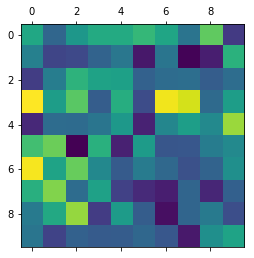

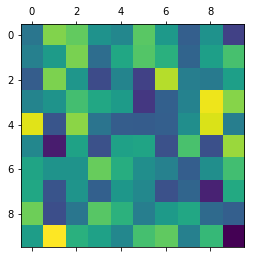

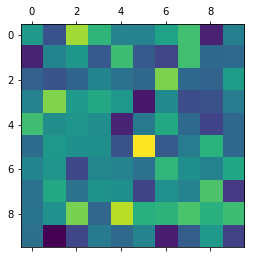

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot each grid to check dimensions are right
[plt.matshow(mygrids[:,:,k]) for k in range(mygrids.shape[2])]
plt.show()

## Final thoughts on HDF5

- Many small files is usually more practical than a few large ones
- Read/Write is faster on smaller files (faster queries)
- Network transfer is usually faster with smaller files
- Storing a lot of data into a single file is susceptible to corruption
- Many small files simplifies (embarrasingly) parallelization

==============================================

# (Part 2) Reducing ICESat-2 files

* Select files of interest (segment and time)
* Select area of interest (subset lat/lon)
* Reduce selected files with variables of interest
* Separate tracks into asc/des
* Plot to check the files

**NOTE**: Remove this when done

OBS: Using Kamb bounding box for now:

xmin, xmax, ymin, ymax = [-1124782, 81623, -919821, -96334]

## How ICESat-2 files are organized 

ICESat-2 ground tracks are subsetted into granules (individual files)

Granules are then grouped into latitudinal bands (segments)

![Segments](segments.png "Latitudinal bands (Segments)")


File naming convention:

`ATL06_20181120202321_08130101_001_01.h5`

`ATL06_[yyyymmdd][hhmmss]_[RGTccss]_[vvv_rr].h5`

where

`ATL_06` : L3A Land Ice product    

`yyyymmdd` : Year, month, day of data acquisition    

`hhmmss` : Hour, minute, second of data acquisition   

`RGT` : Reference Ground Track    

`cc` : Cycle Number   

`ss` : Segment number (latitude band)   

`vvv_rr` : Version and revision numbers  

## Select files of interest

We will use the **file name** info for this (no need to open the files).  

Alternatively, we could retrieve this info from the **Metadata**.

To select files withint a time interval and segment, all we need is:

`yyyymmdd, hhmmss, ss`

Let's firt get a list with all file names

In [39]:
#from utils import *

# Get file list from local folder
if 0:
    from glob import glob

    files = glob('data/*.h5')
    
# Get file list from remote folder (through SSH)
else:    
    import paramiko  # pip install paramiko

    def list_files(host, user, pwd, cmd):
        # Create an SSH client instance.
        client = paramiko.SSHClient()

        # Create a 'host_keys' object
        # and load the local known hosts  
        host_keys = client.load_system_host_keys()

        # Connect to our client w/remote machine credentials
        client.connect(host, username=user, password=pwd)

        # Execute command on remote system,
        # and get input, output and error variables
        stdin, stdout, stderr = client.exec_command(cmd)

        # Iterate over stdout
        files = [line.strip('\n') for line in stdout]

        # Close the connection to client
        client.close()
        return files

    host, user, pwd = 'devon.jpl.nasa.gov', 'paolofer', 'Buzios19@'
    cmd = 'ls /u/devon-r2/shared_data/icesat2/atl06/rel205/raw/*.h5'

    files = list_files(host, user, pwd, cmd)
    
print('Total number of files:', len(files))

ModuleNotFoundError: No module named 'paramiko'

Filter file names by segment and time interval

In [204]:
import os
import datetime as dt

# File name format: ATL06_[yyyymmdd][hhmmss]_[RGTccss]_[vvv_rr].h5

def time_from_fname(fname):
    t = fname.split('_')[1]
    y, m , d, h, mn, s = t[:4], t[4:6], t[6:8], t[8:10], t[10:12], t[12:14]
    time = dt.datetime(int(y), int(m), int(d), int(h), int(mn), int(s))
    return time


def segment_from_fname(fname):
    s = fname.split('_')[2]
    return int(s[-2:])


def select_files(files, segments=[10,11,12], t1=(2019,1,1), t2=(2019,2,1)):
    t1 = dt.datetime(*t1)
    t2 = dt.datetime(*t2)
    files_out = []
    for f in files:
        fname = os.path.basename(f)
        time = time_from_fname(fname)
        segment = segment_from_fname(fname)
        if t1 <= time <= t2 and segment in segments:
            files_out.append(f)
    return files_out

In [205]:
files = select_files(files, segments=[10,11,12], t1=(2019,1,1), t2=(2019,2,1))

for f in files[:5]: print f
print('Number of files:', len(files))

/u/devon-r2/shared_data/icesat2/atl06/rel205/raw/ATL06_20190101001723_00540210_205_01.h5
/u/devon-r2/shared_data/icesat2/atl06/rel205/raw/ATL06_20190101002504_00540211_205_01.h5
/u/devon-r2/shared_data/icesat2/atl06/rel205/raw/ATL06_20190101003047_00540212_205_01.h5
/u/devon-r2/shared_data/icesat2/atl06/rel205/raw/ATL06_20190101015140_00550210_205_01.h5
/u/devon-r2/shared_data/icesat2/atl06/rel205/raw/ATL06_20190101015921_00550211_205_01.h5
Number of files: 1388


## Reduce ICESat-2 files

* Read ICESat-2 nested structure (i.e. subgroups) 
* Select variables of interest (x, y, t, h, ...)
* Reproject lon/lat to x/y polar stereo
* Filter data points based on quality flags
* Save selected variables to a simpler structure

## Select region of interest

* Extract data points within a bounding box
* Plot points within region to check (map and scatter)
* Show single program with all of the above in one go (`readATL06.py`)

## Separate tracks and merge

* Separate tracks into ascending/descending
* Merge beams for crossover analysis
* Plot tracks/beams to check (map and profiles)

## Simple parallelization

* Do the above operations in parallel (just some tips)